In [18]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from pprint import pprint
from random import Random, randint
from glob import glob
from PIL import Image

In [2]:
# load the 50 COCO dataset images
allImagesFiles_fullPath = glob('val2014_50/*.jpg')
allImagesFiles = [ os.path.basename(file) for file in allImagesFiles_fullPath]
allImagesFiles_set = set(allImagesFiles)

In [3]:
allImagesFiles

['COCO_val2014_000000010138.jpg',
 'COCO_val2014_000000043243.jpg',
 'COCO_val2014_000000008548.jpg',
 'COCO_val2014_000000036598.jpg',
 'COCO_val2014_000000048308.jpg',
 'COCO_val2014_000000033979.jpg',
 'COCO_val2014_000000027620.jpg',
 'COCO_val2014_000000029160.jpg',
 'COCO_val2014_000000019444.jpg',
 'COCO_val2014_000000039914.jpg',
 'COCO_val2014_000000003149.jpg',
 'COCO_val2014_000000014547.jpg',
 'COCO_val2014_000000001393.jpg',
 'COCO_val2014_000000043882.jpg',
 'COCO_val2014_000000048014.jpg',
 'COCO_val2014_000000021400.jpg',
 'COCO_val2014_000000029094.jpg',
 'COCO_val2014_000000042190.jpg',
 'COCO_val2014_000000010114.jpg',
 'COCO_val2014_000000020481.jpg',
 'COCO_val2014_000000041478.jpg',
 'COCO_val2014_000000006005.jpg',
 'COCO_val2014_000000037882.jpg',
 'COCO_val2014_000000294763.jpg',
 'COCO_val2014_000000026676.jpg',
 'COCO_val2014_000000027642.jpg',
 'COCO_val2014_000000034580.jpg',
 'COCO_val2014_000000003553.jpg',
 'COCO_val2014_000000001573.jpg',
 'COCO_val2014

In [4]:
with open('annotations/instances_val2014.json', 'r') as fh:
    jsonData = json.load(fh)

In [5]:
# extract categoriesDict, superCategoriesDict from annotations json
categories_dict, superCategories_dict = {}, {}
for currCategoryInfo_dict in jsonData['categories']: # {'id': 1, 'name': 'person', 'supercategory': 'person'}
    categories_dict[currCategoryInfo_dict['id']] = currCategoryInfo_dict['name']
    superCategories_dict[currCategoryInfo_dict['id']] = currCategoryInfo_dict['supercategory']

In [6]:
categories_dict

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [8]:
superCategories_dict

{1: 'person',
 2: 'vehicle',
 3: 'vehicle',
 4: 'vehicle',
 5: 'vehicle',
 6: 'vehicle',
 7: 'vehicle',
 8: 'vehicle',
 9: 'vehicle',
 10: 'outdoor',
 11: 'outdoor',
 13: 'outdoor',
 14: 'outdoor',
 15: 'outdoor',
 16: 'animal',
 17: 'animal',
 18: 'animal',
 19: 'animal',
 20: 'animal',
 21: 'animal',
 22: 'animal',
 23: 'animal',
 24: 'animal',
 25: 'animal',
 27: 'accessory',
 28: 'accessory',
 31: 'accessory',
 32: 'accessory',
 33: 'accessory',
 34: 'sports',
 35: 'sports',
 36: 'sports',
 37: 'sports',
 38: 'sports',
 39: 'sports',
 40: 'sports',
 41: 'sports',
 42: 'sports',
 43: 'sports',
 44: 'kitchen',
 46: 'kitchen',
 47: 'kitchen',
 48: 'kitchen',
 49: 'kitchen',
 50: 'kitchen',
 51: 'kitchen',
 52: 'food',
 53: 'food',
 54: 'food',
 55: 'food',
 56: 'food',
 57: 'food',
 58: 'food',
 59: 'food',
 60: 'food',
 61: 'food',
 62: 'furniture',
 63: 'furniture',
 64: 'furniture',
 65: 'furniture',
 67: 'furniture',
 70: 'furniture',
 72: 'electronic',
 73: 'electronic',
 74: 'el

In [9]:
# imageId_filename_dict save a mapping of imageId and respective filename
# filename_fullInfo_dict saves a mapping of filename and all information that file will need extracted

imageId_filename_dict, filename_fullInfo_dict = {}, {}
for imgDict in jsonData['images']: # list of dictionaries
    image_id, filename = imgDict['id'], imgDict['file_name']
    if filename in allImagesFiles_set:
        imageId_filename_dict[image_id] = filename
        filename_fullInfo_dict[filename] = {
            'image_id': image_id,
            'height': imgDict['height'],
            'width': imgDict['width']    }

In [10]:
# get the image_ids of the 50 image files we have
image_ids = set(list(imageId_filename_dict.keys()))

print("len(imageId_filename_dict) =", len(imageId_filename_dict))
print("len(filename_fullInfo_dict) =", len(filename_fullInfo_dict))
print("len(image_ids) =", len(image_ids))

len(imageId_filename_dict) = 50
len(filename_fullInfo_dict) = 50
len(image_ids) = 50


In [11]:
for annoDict in jsonData['annotations']:
    image_id = annoDict['image_id']
    if image_id in image_ids:
        bbox = annoDict['bbox']
        # this is annotation that might be useful. Add to filename_fullInfo_dict
        filename = imageId_filename_dict[image_id]
        fullInfo = filename_fullInfo_dict[filename]
        try:
            if 'bboxes' not in fullInfo and 'bboxes_categories' not in fullInfo:
                fullInfo['bboxes'] = [annoDict['bbox']]
                fullInfo['bboxes_categories'] = [annoDict['category_id']]
            elif 'bboxes' in fullInfo and 'bboxes_categories' in fullInfo:
                fullInfo['bboxes'].append(annoDict['bbox'])
                fullInfo['bboxes_categories'].append(annoDict['category_id'])
            else:
                raise Exception("This should not be occuring! Both bboxes and bboxes_categories must occur together.")
        except Exception as e:
            print(e)
        
        # save a new version of fullInfo inside filename_fullInfo_dict
        filename_fullInfo_dict[filename] = fullInfo

In [12]:
randomFile_fullPath = Random(42).choice(allImagesFiles)
fullInfo = filename_fullInfo_dict[randomFile_fullPath.split('/')[-1]]
print(randomFile_fullPath)

COCO_val2014_000000041322.jpg


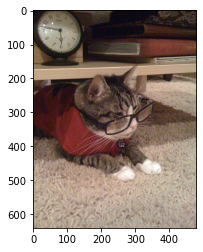

In [19]:
randomImage = np.array(Image.open(os.path.join("val2014_50", randomFile_fullPath)))
ax = plt.subplot(1, 1, 1)
plt.imshow(randomImage)

In [14]:
# number of bounding boxes
if len(fullInfo['bboxes_categories']) > 0:
    cmap = plt.cm.get_cmap('hsv', len(fullInfo['bboxes_categories']))
else:
    cmap = plt.cm.get_cmap('hsv', 1)

ipykernel_launcher:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


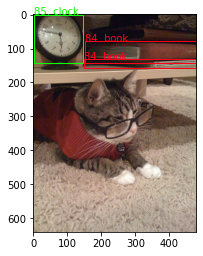

In [20]:
# total number of classes
for ix, (bboxDim, bboxCat) in enumerate(zip(fullInfo['bboxes'], fullInfo['bboxes_categories'])):
    x, y, w, h = bboxDim # starting from top-left
    categoryName = categories_dict[bboxCat]
    
    randomColor = cmap(randint(0, len(fullInfo['bboxes_categories'])))
    ax.annotate(str(bboxCat) + ". " + categoryName, (x, y), color=randomColor, fontsize='medium')
    rect = mpatches.Rectangle((x, y), w, h, linewidth=1, edgecolor=randomColor, facecolor='none')
    ax.add_patch(rect)
    ax = plt.subplot(1, 1, 1)
    plt.imshow(randomImage)

In [21]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [22]:
# add more augmentations if possible
# apply a minimum of 1 and maximum of 4 augmentations
augmentations = iaa.SomeOf((1, 4), [
    iaa.Fliplr(0.5), # flip left-right 50% of the time
    iaa.Flipud(0.25), # flip top-down 25% of the time
    iaa.Sharpen(),
        
    iaa.OneOf([
        iaa.GaussianBlur(),
        iaa.AverageBlur()
    ]),
    
    iaa.OneOf([
        iaa.Dropout((0.01, 0.1), per_channel=0.5),
        iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05),per_channel=0.2),
        iaa.Crop(percent=(0, 0.2)),
        iaa.CropAndPad()
    ]),
    
    iaa.OneOf([
        iaa.AdditiveGaussianNoise(),
        iaa.AdditiveLaplaceNoise(),
        iaa.AdditivePoissonNoise()
    ]),
    
    iaa.OneOf([
        iaa.Salt(),
        iaa.Pepper(),
        iaa.SaltAndPepper()
    ]),
    
    iaa.Affine(rotate=randint(0, 361)),
    
    iaa.OneOf([
        iaa.AddToHue(),
        iaa.AddToSaturation(),
        iaa.AddToHueAndSaturation(),
        iaa.Grayscale(alpha=(0.0, 1.0)),
    ]),
    
    iaa.LinearContrast()
], random_order=True)

In [23]:
def instantiateImgaugBoundingBoxes(bboxesList): # fullInfo['bboxes']
    imgaugBoundingBoxes = []
    for box in bboxesList:
        imgaugBoundingBoxes.append(  BoundingBox(x1=box[0], y1=box[1], x2=box[0]+box[2], y2=box[1]+box[3])  )
    return imgaugBoundingBoxes

In [24]:
bboxes_imgaugFormat = BoundingBoxesOnImage(instantiateImgaugBoundingBoxes(fullInfo['bboxes']), shape=randomImage.shape)

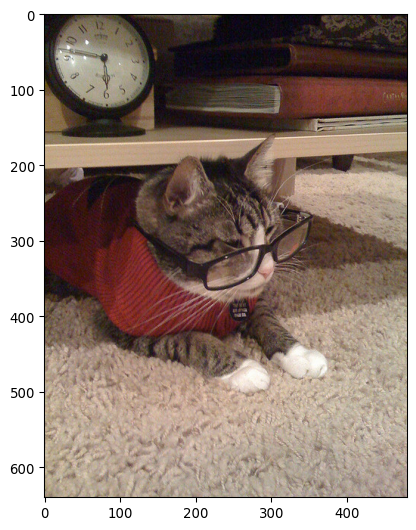

In [25]:
ia.imshow(randomImage)

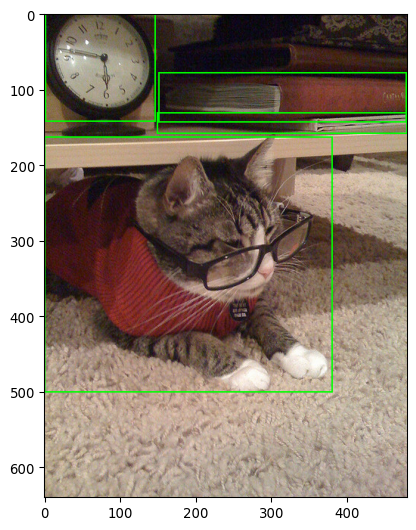

In [26]:
ia.imshow(bboxes_imgaugFormat.draw_on_image(randomImage, size=2))

In [27]:
randomImage_aug, bboxes_aug = augmentations(image=randomImage, bounding_boxes=bboxes_imgaugFormat)

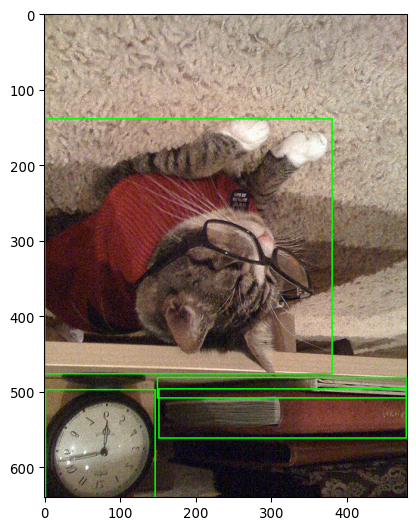

In [31]:
ia.imshow(bboxes_aug.draw_on_image(randomImage_aug, size=2)) # draw bounding box augmentation on the random image obtained